# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!

btc_amount = 1.2
eth_amount = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
response = requests.get(btc_url)
data = response.json()
btc_usd = data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!
response_eth = requests.get(eth_url)
data_eth = response_eth.json()
eth_usd = data_eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_amount * btc_usd
my_eth_value = eth_amount * eth_usd
# Print current crypto wallet balance
print(f"The current value of your {btc_amount} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {eth_amount} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $28648.80
The current value of your 5.3 ETH is $9400.40


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
# YOUR CODE HERE!

api = tradeapi.REST(
 alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!

start_date = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-08-05", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df = api.get_bars(
    tickers,
    timeframe,
    limit = 1000,
    start = start_date,
).df

df = df.sort_index(ascending =False)
df.head()


recent_spy_close = df.iloc[0,3]
recent_agg_close = df.iloc[1,3]

print(f'The most recent SPY closing price is {recent_spy_close}')
print(f'The most recent AGG  closing price is {recent_agg_close}')
#print(df.head())
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

spy_df =df[df.symbol == 'SPY']
agg_df = df[df.symbol == 'AGG']

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
merged_df = pd.concat([spy_df, agg_df], axis=1)
# Preview DataFrame
# YOUR CODE HERE!
merged_df.head()

The most recent SPY closing price is 412.99
The most recent AGG  closing price is 103.18


,open,high,low,close,volume,trade_count,vwap,symbol,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,,,,,,,,
2022-08-08 04:00:00+00:00,415.25,417.62,411.83,412.99,53661773,418194,414.424300,SPY,103.10,103.290,103.040,103.18,3219136,15829,103.175214,AGG
2022-08-05 04:00:00+00:00,409.68,414.15,409.60,413.47,56751151,455450,412.292366,SPY,102.81,102.830,102.520,102.71,4847064,16418,102.711038,AGG
2022-08-04 04:00:00+00:00,414.25,415.09,412.44,414.17,45565581,364658,414.080458,SPY,103.67,103.890,103.570,103.87,5198972,17078,103.727981,AGG
2022-08-03 04:00:00+00:00,410.40,415.68,410.00,414.45,67573063,463932,413.267159,SPY,103.03,103.640,102.720,103.62,6254853,23383,103.276553,AGG
2022-08-02 04:00:00+00:00,409.03,413.00,406.82,408.06,63113622,502751,409.635855,SPY,104.27,104.345,103.135,103.16,6866199,38447,103.522777,AGG


In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
spy_close_price = merged_df.iloc[0,3]
agg_close_price = merged_df.iloc[0,11]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $103.18
Current SPY closing price: $412.99


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20649.50
The current value of your 200 AGG shares is $20636.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto = my_btc_value + my_eth_value
stocks_bonds = my_spy_value + my_agg_value

total = ['Crypto', 'Stocks and Bonds']
savings_data = [crypto, stocks_bonds]

amount = {'Total USD Value' : [crypto, stocks_bonds]}
# Create savings DataFrame
# YOUR CODE HERE!
savings_df = pd.DataFrame(amount, index = total)
# Display savings DataFrame
display(savings_df)

,Total USD Value
Crypto,38049.198
Stocks and Bonds,41285.500


<AxesSubplot:title={'center':'Savings and Investments Breakdown'}, ylabel='Total USD Value'>

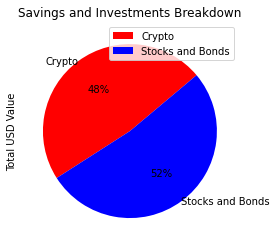

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
colors = ['r', 'b']
savings_df.plot.pie(y = [0][0], 
                    labels = total, 
                    labeldistance = 1,
                    autopct='%1.0f%%',
                    colors = colors, 
                    startangle = 40,
                    title = 'Savings and Investments Breakdown')


In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
crypto = round(crypto, 2)
stocks_bonds = round(stocks_bonds, 2)
total_savings = crypto + stocks_bonds
# Validate saving health
# YOUR CODE HERE!


def enough_savings(fund, savings):
    if emergency_fund < total_savings:
            print(f'Congratulations, you have enough savings to create an emergency fund and maintain a surplus of ${total_savings - emergency_fund}.')
    elif emergency_fund == total_savings:
            print('Congratulations, you have enough savings to create an emergency fund, but will have no investments left over.')
    elif emergency_fund > total_savings:
            print(f'You are ${abs(emergency_fund - total_savings)} away from having enough money to create an emergency fund.')
                
enough_savings(emergency_fund, total_savings)

Congratulations, you have enough savings to create an emergency fund and maintain a surplus of $43334.7.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 3 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
retirement_df = api.get_bars(
    tickers,
    timeframe,
    limit = 1000,
    start = start_date,
).df

agg = retirement_df[retirement_df['symbol']=='AGG'].drop('symbol', axis=1)
spy = retirement_df[retirement_df['symbol'] == 'SPY'].drop('symbol', axis=1)

retirement_df = pd.concat([spy, agg], axis = 1, keys = ['SPY', 'AGG'])

#retirement_df.columns = ['spy close', 'agg close']

# Display sample data

retirement_df.head()



SPY                                         \
                             open      high     low   close       volume   
timestamp                                                                  
2019-08-07 04:00:00+00:00  284.40  288.8200  282.04  287.97  143723012.0   
2019-08-08 04:00:00+00:00  289.62  293.6200  289.01  293.62   88075904.0   
2019-08-09 04:00:00+00:00  292.59  293.2400  289.65  291.62   93729958.0   
2019-08-12 04:00:00+00:00  289.90  291.6052  287.02  288.07   60895115.0   
2019-08-13 04:00:00+00:00  287.78  294.1500  287.36  292.55  100693314.0   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2019-08-07 04:00:00+00:00    668446.0  286.311024  113.17  113.2900  112.610   
2019-08-08 04:00:00+00:00    406693.0  291.727950  112.51  112.8200  112.330   
2019-08-09 04:00:00+00:00    451157.0  291.732496  112.86  112.9500  112.575   
2019-08-12 04:00:00+00:00    324202.0  288.889779  112.93  113.1850  112.870   
2019-08-13 04:00:00+00:00    490220.0  292.076183  113.15  113.1504  112.785   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-08-07 04:00:00+00:00  112.68  9156551       37550  112.959111  
2019-08-08 04:00:00+00:00  112.79  3707196       15027  112.586906  
2019-08-09 04:00:00+00:00  112.64  2432292        9508  112.748706  
2019-08-12 04:00:00+00:00  113.05  2246369        8960  113.035477  
2019-08-13 04:00:00+00:00  112.89  3048591       13159  112.925793

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims = 1000

MC_Daily = MCSimulation(
    portfolio_data = retirement_df,
    weights = [.60, .40],
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)

In [32]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_Daily.portfolio_data.head()

SPY                                         \
                             open      high     low   close       volume   
timestamp                                                                  
2019-08-07 04:00:00+00:00  284.40  288.8200  282.04  287.97  143723012.0   
2019-08-08 04:00:00+00:00  289.62  293.6200  289.01  293.62   88075904.0   
2019-08-09 04:00:00+00:00  292.59  293.2400  289.65  291.62   93729958.0   
2019-08-12 04:00:00+00:00  289.90  291.6052  287.02  288.07   60895115.0   
2019-08-13 04:00:00+00:00  287.78  294.1500  287.36  292.55  100693314.0   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-08-07 04:00:00+00:00    668446.0  286.311024          NaN  113.17   
2019-08-08 04:00:00+00:00    406693.0  291.727950     0.019620  112.51   
2019-08-09 04:00:00+00:00    451157.0  291.732496    -0.006812  112.86   
2019-08-12 04:00:00+00:00    324202.0  288.889779    -0.012173  112.93   
2019-08-13 04:00:00+00:00    490220.0  292.076183     0.015552  113.15   

                                                                           \
                               high      low   close   volume trade_count   
timestamp                                                                   
2019-08-07 04:00:00+00:00  113.2900  112.610  112.68  9156551       37550   
2019-08-08 04:00:00+00:00  112.8200  112.330  112.79  3707196       15027   
2019-08-09 04:00:00+00:00  112.9500  112.575  112.64  2432292        9508   
2019-08-12 04:00:00+00:00  113.1850  112.870  113.05  2246369        8960   
2019-08-13 04:00:00+00:00  113.1504  112.785  112.89  3048591       13159   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-08-07 04:00:00+00:00  112.959111          NaN  
2019-08-08 04:00:00+00:00  112.586906     0.000976  
2019-08-09 04:00:00+00:00  112.748706    -0.001330  
2019-08-12 04:00:00+00:00  113.035477     0.003640  
2019-08-13 04:00:00+00:00  112.925793    -0.001415

In [33]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_Daily.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Luke\Desktop\Fintech Bootcamp\ModuleFive\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7557,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7558,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7559,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

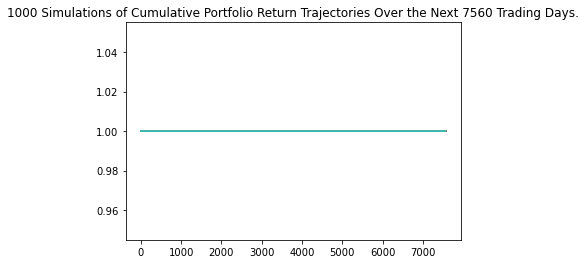

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_sim.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

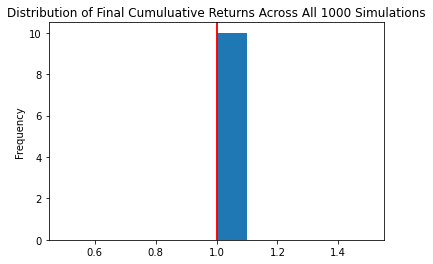

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
mc_sim.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary = mc_sim.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary)

count           1000.0
mean               1.0
std                0.0
min                1.0
25%                1.0
50%                1.0
75%                1.0
max                1.0
95% CI Lower       1.0
95% CI Upper       1.0
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(summary[8] * 20000, 2)
ci_upper = round(summary[9] * 20000, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $20000.0 and $20000.0


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(summary[8] * 30000, 2)
ci_upper = round(summary[9] * 30000, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $30000.0 and $30000.0


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")